In [1]:
%matplotlib inline

from __future__ import print_function
import math
import itertools
import numpy
import numpy.linalg
import matplotlib.pyplot as plt

In [2]:
L = 4
nmax = 3
nstates = (nmax + 1) ** L
states = numpy.empty((nstates, L), dtype=int)
print('#sites:                   %i' % L)
print('nmax:                     %i' % nmax)
print('Hilbert-space dimensions: %i' % nstates)

#sites:                   4
nmax:                     3
Hilbert-space dimensions: 256


In [3]:
istate=0
for state in itertools.product(range(nmax + 1), repeat=L):
    states[istate, :] = state[:]
    istate += 1
print('States enumeration completed')

States enumeration completed


In [4]:
# Fill matrix H
def build_H(states, U, J, mu):

    _nstates = len(states)
    _H = numpy.zeros((_nstates, _nstates))
    for istate1, state1 in enumerate(states):
        
        # Diagonal terms
        for site in xrange(L):
            _H[istate1, istate1] += 0.5 * U * state1[site] * (state1[site] - 1.0)
            _H[istate1, istate1] -= mu * state1[site]
            
        # Off-diagonal terms
        for istate2, state2 in enumerate(states):

            for site in xrange(L):

                state1_site = state1[site]
                state2_site = state2[site]
                state1_site_p1 = state1[(site + 1) % L]
                state2_site_p1 = state2[(site + 1) % L]

                if ((state1_site == (state2_site + 1)) and
                    (state1_site_p1 == (state2_site_p1 - 1))):
                    _H[istate1, istate2] -= J * math.sqrt(state1_site * (state1_site_p1 + 1.0))
                    assert istate1 != istate2
                    
                if ((state1_site_p1 == (state2_site_p1 + 1)) and
                    (state1_site == (state2_site - 1))):
                    _H[istate1, istate2] -= J * math.sqrt(state1_site_p1 * (state1_site + 1.0))
                    
    assert numpy.allclose(_H, _H.T)
    return _H[:, :].copy()


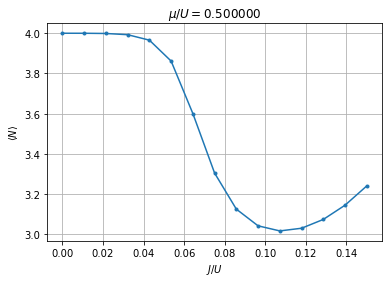

In [5]:
def get_Ntotal(coefficients, states):
    Ntotal = 0.0
    for istate, state in enumerate(states):
        Ntotal += (coefficients[istate] ** 2) * state.sum()
    return Ntotal


U = 1.0
mu = 0.5
list_J = numpy.linspace(0.0, 0.15, 15)
list_N = numpy.empty_like(list_J)
for iJ, J in enumerate(list_J):
    H = build_H(states, 10.0, J, mu)
    evals, evecs = numpy.linalg.eigh(H)
    indices = evals.argsort()
    evals = evals[indices]
    evecs = (evecs.T)[indices]
    list_N[iJ] = get_Ntotal(evecs[0], states)

plt.plot(list_J / U, list_N, '.-')
plt.xlabel('$J/U$')
plt.ylabel('$\\langle N \\rangle$')
plt.title('$\\mu/U=%s$' % (mu / U))
plt.grid()